In [5]:
### utility functions 
import pandas as pd
import sqlite3
from sqlite3 import Error
from datetime import datetime


def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name:
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows


normalized_db_filename = 'normalized.db'
data_filename = 'Crime_Incidents.csv'
conn_norm = create_connection(normalized_db_filename)

### create Day table
create_table_day = """
CREATE TABLE Day (
    DayID INTEGER NOT NULL PRIMARY KEY,
    Day TEXT
)
"""
create_table(conn_norm, create_table_day, 'Day')

def insert_dates(conn, values):
    sql_statement = """
    INSERT INTO Day(Day)
    VALUES(?)
    """
    cur = conn.cursor()
    cur.executemany(sql_statement, values)
    return cur.lastrowid

Day = []
header = None
with open(data_filename) as file:
    for line in file:
        if not line.strip():
            continue
        
        if not header:
            header = line.strip().split('\t')
            continue
        
        line = line.strip().split(',')
        
        if [line[7]] not in Day:
            Day.append([line[7]])
    
with conn_norm:
    insert_dates(conn_norm, Day)


### create Day to DayID dictionary 
def create_day_dict(normalized_db_filename):
    conn_norm = create_connection(normalized_db_filename)

    day = execute_sql_statement(
    """
    SELECT *
    FROM Day
    """
    , conn_norm)
    
    day_dict = {}
    for dayID, day in day:
        day_dict[day] = dayID
    
    return day_dict

### create PrimaryIncident table
create_table_primary_incident = """
CREATE TABLE PrimaryIncident (
    PrimaryIncidentID INTEGER NOT NULL PRIMARY KEY,
    PrimaryIncident TEXT
)
"""
create_table(conn_norm, create_table_primary_incident, 'PrimaryIncident')

def insert_primary_incident(conn, values):
    sql_statement = """
    INSERT INTO PrimaryIncident(PrimaryIncident)
    VALUES(?)
    """
    cur = conn.cursor()
    cur.executemany(sql_statement, values)
    return cur.lastrowid

PrimaryIncident = []
header = None
with open(data_filename) as file:
    for line in file:
        if not line.strip():
            continue
        
        if not header:
            header = line.strip().split('\t')
            continue
        
        line = line.strip().split(',')
        
        if [line[3]] not in PrimaryIncident:
            PrimaryIncident.append([line[3]])
    
with conn_norm:
    insert_primary_incident(conn_norm, PrimaryIncident)


### create PrimaryIncident to PrimaryIncidentID dictionary 
def create_primary_incident_dict(normalized_db_filename):
    
    conn_norm = create_connection(normalized_db_filename)

    primary_incident = execute_sql_statement(
    """
    SELECT *
    FROM PrimaryIncident
    """
    , conn_norm)
    
    primary_incident_dict = {}
    for primary_incidentID, primary_incident in primary_incident:
        primary_incident_dict[primary_incident] = primary_incidentID
    
    return primary_incident_dict

### create ParentIncident table
create_table_parent_incident = """
CREATE TABLE ParentIncident (
    ParentIncidentID INTEGER NOT NULL PRIMARY KEY,
    ParentIncident TEXT
)
"""
create_table(conn_norm, create_table_parent_incident, 'ParentIncident')

def insert_parent_incident(conn, values):
    sql_statement = """
    INSERT INTO ParentIncident(ParentIncident)
    VALUES(?)
    """
    cur = conn.cursor()
    cur.executemany(sql_statement, values)
    return cur.lastrowid

ParentIncident = []
header = None
with open(data_filename) as file:
    for line in file:
        if not line.strip():
            continue
        
        if not header:
            header = line.strip().split('\t')
            continue
        
        line = line.strip().split(',')
        
        if [line[5]] not in ParentIncident:
            ParentIncident.append([line[5]])
    
with conn_norm:
    insert_parent_incident(conn_norm, ParentIncident)


### create ParentIncident to ParentIncidentID dictionary 
def create_parent_incident_dict(normalized_db_filename):
    
    conn_norm = create_connection(normalized_db_filename)

    parent_incident = execute_sql_statement(
    """
    SELECT *
    FROM ParentIncident
    """
    , conn_norm)
    
    parent_incident_dict = {}
    for parent_incidentID, parent_incident in parent_incident:
        parent_incident_dict[parent_incident] = parent_incidentID
    
    return parent_incident_dict

### create Neighborhood table
create_table_neighborhood = """
CREATE TABLE Neighborhood(
    NeighborhoodID INTEGER NOT NULL PRIMARY KEY,
    Neighborhood TEXT
)
"""
create_table(conn_norm, create_table_neighborhood, 'Neighborhood')

def insert_neighborhoods(conn, values):
    sql_statement = """
    INSERT INTO Neighborhood(Neighborhood)
    VALUES(?)
    """
    cur = conn.cursor()
    cur.executemany(sql_statement, values)
    return cur.lastrowid

Neighborhood = []
header = None
with open(data_filename) as file:
    for line in file:
        if not line.strip():
            continue
        
        if not header:
            header = line.strip().split('\t')
            continue
        
        line = line.strip().split(',')
        
        if [line[22]] not in Neighborhood:
            Neighborhood.append([line[22]])
    
with conn_norm:
    insert_neighborhoods(conn_norm, Neighborhood)

### create Neighborhood to NeighborhoodID dictionary 
def create_neighborhood_dict(normalized_db_filename):

    conn_norm = create_connection(normalized_db_filename)

    neighborhood = execute_sql_statement(
    """
    SELECT *
    FROM Neighborhood
    """
    , conn_norm)
    
    neighborhood_dict = {}
    for neighborhoodID, neighborhood in neighborhood:
        neighborhood_dict[neighborhood] = neighborhoodID

    return neighborhood_dict

### create District table
create_table_district = """
CREATE TABLE District(
    DistrictID INTEGER NOT NULL PRIMARY KEY,
    District TEXT
)
"""
create_table(conn_norm, create_table_district, 'District')

def insert_districts(conn, values):
    sql_statement = """
    INSERT INTO District(District)
    VALUES(?)
    """
    cur = conn.cursor()
    cur.executemany(sql_statement, values)
    return cur.lastrowid

District = []
header = None
with open(data_filename) as file:
    for line in file:
        if not line.strip():
            continue
        
        if not header:
            header = line.strip().split('\t')
            continue
        
        line = line.strip().split(',')
        
        if [line[24]] not in District:
            District.append([line[24]])
    
with conn_norm:
    insert_districts(conn_norm, District)

### create District to DistrictID dictionary 
def create_district_dict(normalized_db_filename):

    conn_norm = create_connection(normalized_db_filename)

    district = execute_sql_statement(
    """
    SELECT *
    FROM District
    """
    , conn_norm)
    
    district_dict = {}
    for districtID, district in district:
        district_dict[district] = districtID

    return district_dict

### create Police District table
create_table_police_district = """
CREATE TABLE PoliceDistrict(
    PoliceDistrictID INTEGER NOT NULL PRIMARY KEY,
    PoliceDistrict TEXT
)
"""
create_table(conn_norm, create_table_police_district, 'PoliceDistrict')

def insert_police_districts(conn, values):
    sql_statement = """
    INSERT INTO PoliceDistrict(PoliceDistrict)
    VALUES(?)
    """
    cur = conn.cursor()
    cur.executemany(sql_statement, values)
    return cur.lastrowid

PoliceDistrict = []
header = None
with open(data_filename) as file:
    for line in file:
        if not line.strip():
            continue
        
        if not header:
            header = line.strip().split('\t')
            continue
        
        line = line.strip().split(',')
        
        if [line[23]] not in PoliceDistrict:
            PoliceDistrict.append([line[23]])
    
with conn_norm:
    insert_police_districts(conn_norm, PoliceDistrict)

### create PoliceDistrict to PoliceDistrictID dictionary 
def create_police_district_dict(normalized_db_filename):

    conn_norm = create_connection(normalized_db_filename)

    police_district = execute_sql_statement(
    """
    SELECT *
    FROM PoliceDistrict
    """
    , conn_norm)
    
    police_district_dict = {}
    for police_districtID, police_district in police_district:
        police_district_dict[police_district] = police_districtID

    return police_district_dict

### create Case table
create_table_cases = """
CREATE TABLE Cases(
	    CaseNum TEXT NOT NULL PRIMARY KEY,
        IncidentDateTime Date NOT NULL,
        PrimaryIncidentID NOT NULL,
        ParentIncidentID NOT NULL,
        Latitude REAL,
        Longitude REAL,
        Hour INTEGER,
        DayID INTEGER NOT NULL,
        DistrictID INTEGER NOT NULL,
        PoliceDistrictID INTEGER NOT NULL,
        NeighborhoodID INTEGER NOT NULL,
        FOREIGN KEY (PrimaryIncidentID) REFERENCES PrimaryIncident(PrimaryIncidentID),
        FOREIGN KEY (ParentIncidentID) REFERENCES ParentIncident(ParentIncidentID),
        FOREIGN KEY (DayID) REFERENCES Day(DayID),
        FOREIGN KEY (DistrictID) REFERENCES District(DistrictID),
        FOREIGN KEY (PoliceDistrictID) REFERENCES PoliceDistrict(PoliceDistrictID),
        FOREIGN KEY (NeighborhoodID) REFERENCES Neighborhood(NeighborhoodID)
)
"""
create_table(conn_norm, create_table_cases, 'Cases')

def insert_cases(conn, values):
    sql_statement = """
    INSERT INTO Cases(CaseNum, IncidentDateTime, ParentIncidentID, PrimaryIncidentID, Latitude, Longitude, Hour, DayID, DistrictID, PoliceDistrictID, NeighborhoodID)
    VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """
    cur = conn.cursor()
    cur.executemany(sql_statement, values)
    return cur.lastrowid

parent_dict = create_parent_incident_dict(normalized_db_filename)
primary_dict = create_primary_incident_dict(normalized_db_filename)
day_dict = create_day_dict(normalized_db_filename)   
district_dict = create_district_dict(normalized_db_filename)
police_district_dict = create_police_district_dict(normalized_db_filename)
neighborhood_dict = create_neighborhood_dict(normalized_db_filename)


Cases = []
header = None
with open(data_filename) as file:
    for line in file:
        if not line.strip():
            continue
        
        if not header:
            header = line.strip().split('\t')
            continue
        
        line = line.strip().split(',')
        
        case_num = line[0] 
        if line[1]!= "":
            incident_datetime = datetime.strptime(line[1], '%m/%d/%y %H:%M').strftime('%Y-%m-%d %H:%M')
        else:
            incident_datetime = line[1]
        parent_incident = line[5]
        parent_incidentID = parent_dict[parent_incident]  
        primary_incident = line[3]
        primary_incidentID = primary_dict[primary_incident]    
        latitude = line[12]
        longitude = line[13]
        hour = line[6]
        day = line[7]
        dayID = day_dict[day]
        district = line[24]
        districtID = district_dict[district]
        police_district = line[23]
        police_districtID = police_district_dict[police_district]
        neighborhood_ = line[22]
        neighborhood_ID= neighborhood_dict[neighborhood_]
        Cases.append((case_num, incident_datetime, parent_incidentID, primary_incidentID, latitude, longitude, hour, dayID, districtID, police_districtID,neighborhood_ID))
    
with conn_norm:
    insert_cases(conn_norm, Cases)

In [100]:
    day_query_statement = "select * from Day"
    PrimaryIncident_query_statement = "select * from PrimaryIncident limit 5"
    ParentIncident_query_statement = "select * from ParentIncident limit 5"
    Neighborhood_query_statement  = "select * from Neighborhood limit 5"
    District_query_statement = "select * from District limit 5"
    PoliceDistrict_query_statement = "select * from PoliceDistrict limit 5"
    Cases_query_statement  = "select * from Cases limit 5"

    day_df = pd.read_sql_query(
        day_query_statement, conn_norm)
    PrimaryIncident_df = pd.read_sql_query(
        PrimaryIncident_query_statement, conn_norm)
    ParentIncident_df = pd.read_sql_query(
        ParentIncident_query_statement, conn_norm)
    Neighborhood_df = pd.read_sql_query(
        Neighborhood_query_statement, conn_norm)
    District_df = pd.read_sql_query(
        District_query_statement, conn_norm)
    PoliceDistrict_df = pd.read_sql_query(
        PoliceDistrict_query_statement, conn_norm)
    Cases_df = pd.read_sql_query(
        Cases_query_statement, conn_norm)

In [101]:
display(day_df)
display(PrimaryIncident_df)
display(ParentIncident_df)
display(Neighborhood_df)
display(District_df)
display(PoliceDistrict_df)
display(Cases_df)

,DayID,Day
0,1,Thursday
1,2,Friday
2,3,Sunday
3,4,Monday
4,5,Saturday
5,6,Tuesday
6,7,Wednesday
7,8,Null


,PrimaryIncidentID,PrimaryIncident
0,1,LARCENY/THEFT
1,2,UUV
2,3,SEXUAL ABUSE
3,4,BURGLARY
4,5,ASSAULT


,ParentIncidentID,ParentIncident
0,1,Theft
1,2,Theft of Vehicle
2,3,Sexual Offense
3,4,Breaking & Entering
4,5,Assault


,NeighborhoodID,Neighborhood
0,1,Schiller Park
1,2,Kensington-Bailey
2,3,North Park
3,4,First Ward
4,5,Ellicott


,DistrictID,District
0,1,LOVEJOY
1,2,UNIVERSITY
2,3,NORTH
3,4,FILLMORE
4,5,ELLICOTT


,PoliceDistrictID,PoliceDistrict
0,1,District E
1,2,District D
2,3,District A
3,4,District C
4,5,District B


,CaseNum,IncidentDateTime,PrimaryIncidentID,ParentIncidentID,Latitude,Longitude,Hour,DayID,DistrictID,PoliceDistrictID,NeighborhoodID
0,22-1110134,2022-04-21 07:08,1,1,42.918,-78.804,7,1,1,1,1
1,22-1110924,2022-04-21 17:30,1,1,42.939,-78.800,23,1,2,1,2
2,22-1120542,2022-04-22 15:18,1,1,42.952,-78.876,15,2,3,2,3
3,22-1120960,2022-04-22 22:00,1,1,42.868,-78.850,22,2,4,3,4
4,22-1140104,2022-04-24 00:58,1,1,42.874,-78.871,2,3,4,3,5


# Crime Occurrence by Hour of the day

High: 0-1 AM
Low: 5-6 AM
Moderate: Evenings

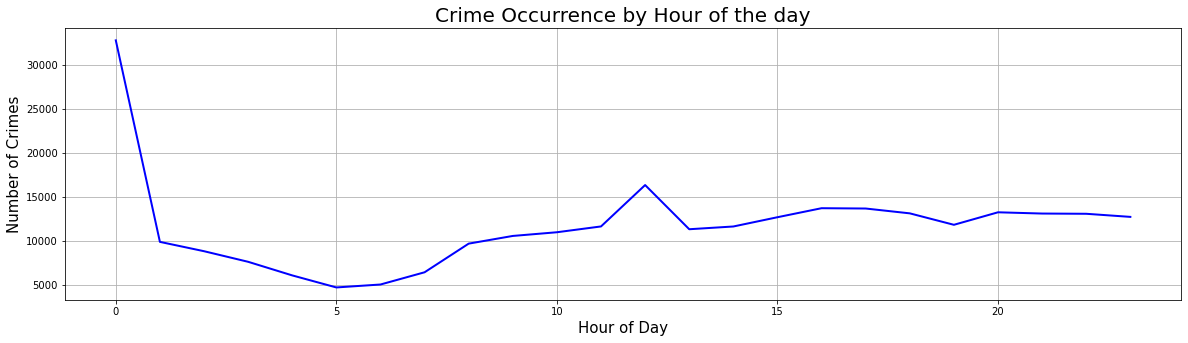

In [69]:
import matplotlib.pyplot as plt
def occurrence_by_hour(conn_norm):
    sql_statement = """
    select COUNT(*) as 'Number of Crimes', Hour from Cases group by Hour
    """
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df

plt.rcParams['figure.figsize'] = (20, 5)

x = occurrence_by_hour(conn_norm)['Hour']
y = occurrence_by_hour(conn_norm)['Number of Crimes']
plt.plot(x, y, linewidth=2,color='blue')
plt.xlabel("Hour of Day",fontsize=15)
plt.ylabel("Number of Crimes",fontsize=15)
plt.title("Crime Occurrence by Hour of the day",fontsize=20)
plt.grid(True)
plt.show()

# Crime Occurrence by hour of the day with Incident Type

High: Theft, Breaking and Entering, Assault, Robbery, Other Sexual Offence, Sexual Assault
Low: Theft, Assault, Robbery, Sexual Assault
Moderate: Theft, Assault, Robbery, Sexual Assault

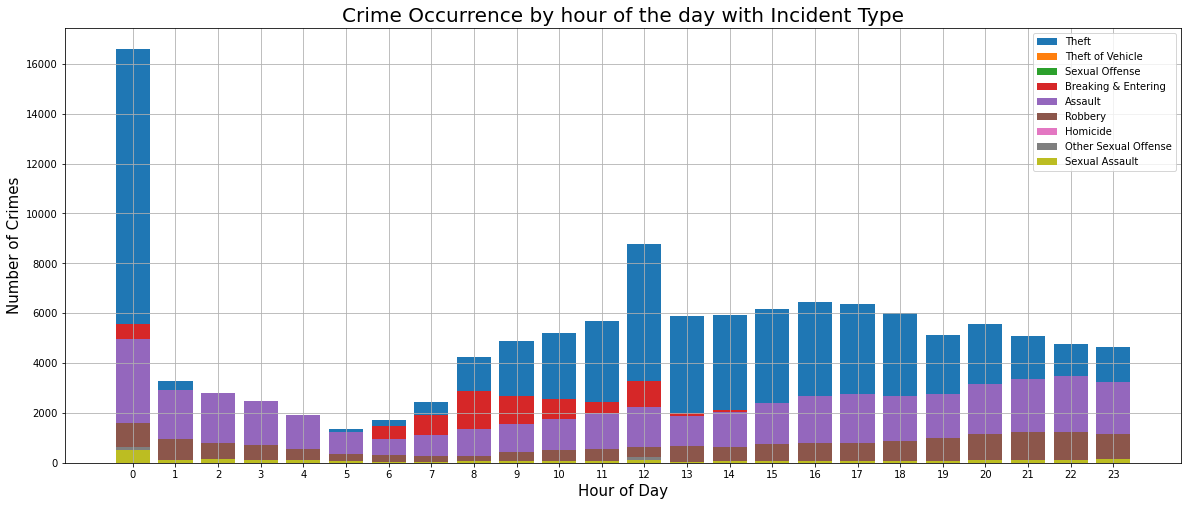

In [72]:
def occurrence_by_hour_filter_by_parent_incident(conn_norm, parent_incident):
    sql_statement = """
    select COUNT(*) as 'Number of Crimes', Hour from(
        select c.CaseNum, c.Hour, p.ParentIncident as ParentIncident from
        Cases as c INNER JOIN ParentIncident as p ON c.ParentIncidentID = p.ParentIncidentID
    )where ParentIncident = '{}' group by Hour
    """.format(parent_incident)
    
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df


x = occurrence_by_hour(conn_norm)['Hour']

for parent_incident in pd.read_sql_query("select ParentIncident from ParentIncident", conn_norm)['ParentIncident']:
    y = occurrence_by_hour_filter_by_parent_incident(conn_norm, parent_incident)['Number of Crimes']
    plt.bar(x, y, label = parent_incident, tick_label = range(0, 24))

plt.rcParams['figure.figsize'] = (20, 8)
plt.xlabel("Hour of Day",fontsize=15)
plt.ylabel("Number of Crimes",fontsize=15)
plt.title("Crime Occurrence by hour of the day with Incident Type", fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# Crime Occurrence by Day

High: Friday, Saturday
Moderate: Rest of the days

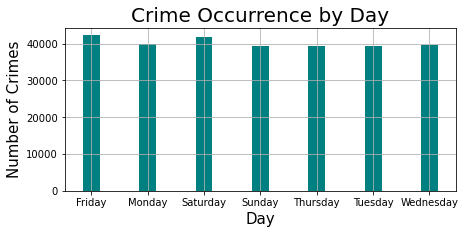

In [73]:
def occurrence_by_day(conn_norm):
    sql_statement = """
    
    select COUNT(*) as 'Number of Crimes', Day from (
        select c.CaseNum, d.Day from
        Cases as c INNER JOIN Day as d ON c.DayID = d.DayID
    ) where Day <> 'Null' group by Day
    
    """
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df

xlist = occurrence_by_day(conn_norm)['Day']
ylist = occurrence_by_day(conn_norm)['Number of Crimes']

plt.rcParams['figure.figsize'] = (7, 3)

plt.bar(xlist, ylist, width= 0.3,color='teal')
plt.xlabel("Day", fontsize=15)
plt.ylabel("Number of Crimes",fontsize=15)
plt.title("Crime Occurrence by Day",fontsize=20)
plt.grid(True)
plt.show()

# Crime Occurrence by District

Most Unsafe: Ellicott
Low: South, Delaware

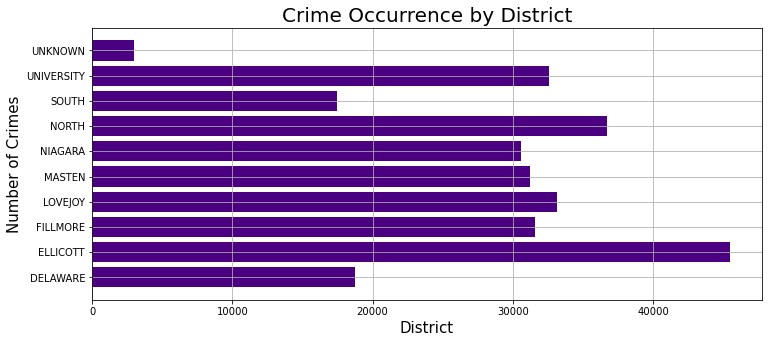

In [74]:
def occurrence_by_district(conn_norm):
    sql_statement = """
    select COUNT(*) as 'Number of Crimes', District from (
        select c.CaseNum, d.District from
        Cases as c INNER JOIN District as d ON c.DistrictID = d.DistrictID
    ) where District <> '' group by District
    """
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df

xlist = occurrence_by_district(conn_norm)['District']
ylist = occurrence_by_district(conn_norm)['Number of Crimes']
plt.rcParams['figure.figsize'] = (12, 5)
plt.barh(xlist, ylist,color='indigo')
plt.xlabel("District",fontsize=15)
plt.ylabel("Number of Crimes",fontsize=15)
plt.title("Crime Occurrence by District",fontsize=20)
plt.grid(True)
plt.show()

# Crime Occurrence by Police District

Most Crime: Police District D and E
Less Crime: Police District A

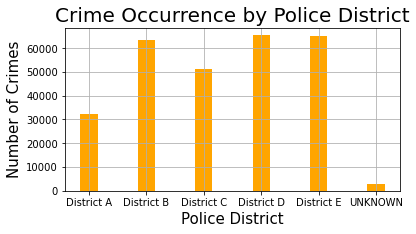

In [75]:
def occurrence_by_policedistrict(conn_norm):
    sql_statement = """
    select COUNT(*) as 'Number of Crimes', PoliceDistrict from (
        select c.CaseNum, d.PoliceDistrict from
        Cases as c INNER JOIN PoliceDistrict as d ON c.PoliceDistrictID = d.PoliceDistrictID
    ) where PoliceDistrict <> '' group by PoliceDistrict
    """
    
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df
xlist = occurrence_by_policedistrict(conn_norm)['PoliceDistrict']
ylist = occurrence_by_policedistrict(conn_norm)['Number of Crimes']

plt.rcParams['figure.figsize'] = (6, 3)
plt.bar(xlist, ylist, width = 0.3,color='orange')
plt.xlabel("Police District",fontsize=15)
plt.ylabel("Number of Crimes",fontsize=15)
plt.title("Crime Occurrence by Police District",fontsize=20)
plt.grid(True)
plt.show()

# Crime Occurrence by Primary Incident

High: LARCENY/THEFT
Low: Homicide

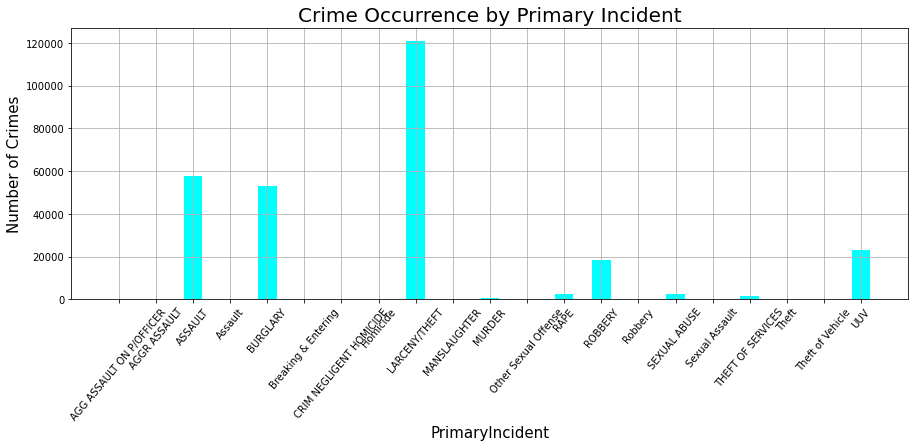

In [76]:
def occurrence_by_primary_incident(conn_norm):
    sql_statement = """
    select COUNT(*) as 'Number of Crimes', PrimaryIncident from (
        select c.CaseNum, p.PrimaryIncident from
        Cases as c INNER JOIN PrimaryIncident as p ON c.PrimaryIncidentID = p.PrimaryIncidentID
    )group by PrimaryIncident
    """
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df

xlist = occurrence_by_primary_incident(conn_norm)['PrimaryIncident']
ylist = occurrence_by_primary_incident(conn_norm)['Number of Crimes']
plt.rcParams['figure.figsize'] = (15, 5)
plt.bar(xlist, ylist, width = 0.5,color='cyan')
plt.xlabel("PrimaryIncident",fontsize=15)
plt.xticks(rotation = 50)
plt.ylabel("Number of Crimes",fontsize=15)
plt.title("Crime Occurrence by Primary Incident",fontsize=20)
plt.grid(True)
plt.show()

# Crime Occurrence by Parent Incident

In [ ]:
High: Theft
Low: Sexual Offense

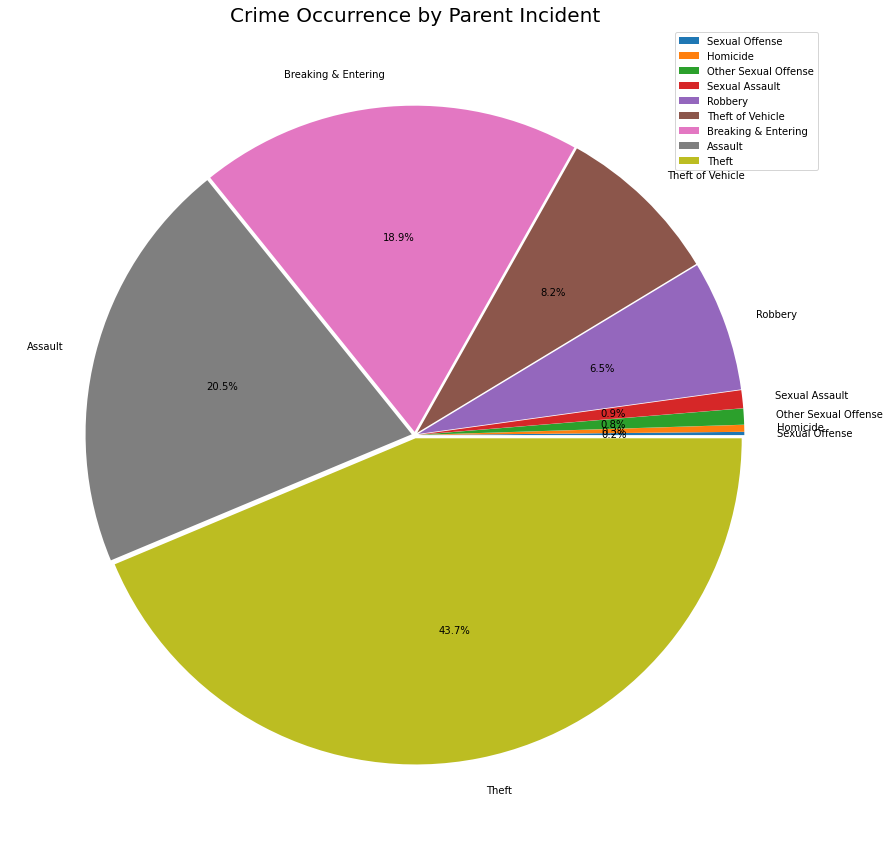

In [102]:
# Statistics of crime occurrence by ParentIncident

def occurrence_by_parent_incident(conn_norm):
    sql_statement = """
    
    select COUNT(*) as 'Number of Crimes', ParentIncident from (
        select c.CaseNum, p.ParentIncident from
        Cases as c INNER JOIN ParentIncident as p ON c.ParentIncidentID = p.ParentIncidentID
    )group by ParentIncident
    
    """
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df

ylist, xlist = zip(*sorted(zip(occurrence_by_parent_incident(conn_norm)['Number of Crimes'], occurrence_by_parent_incident(conn_norm)['ParentIncident'])))

plt.rcParams['figure.figsize'] = (15, 15)
explode = (0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01)
plt.pie(x = ylist, labels = xlist, autopct = '%0.1f%%', explode = explode)
plt.title("Crime Occurrence by Parent Incident",fontsize=20)
plt.legend(loc = "upper right")


# Crime Occurrence by Neighborhood

In [ ]:
High: Broadway Fillmore
Low: First Ward

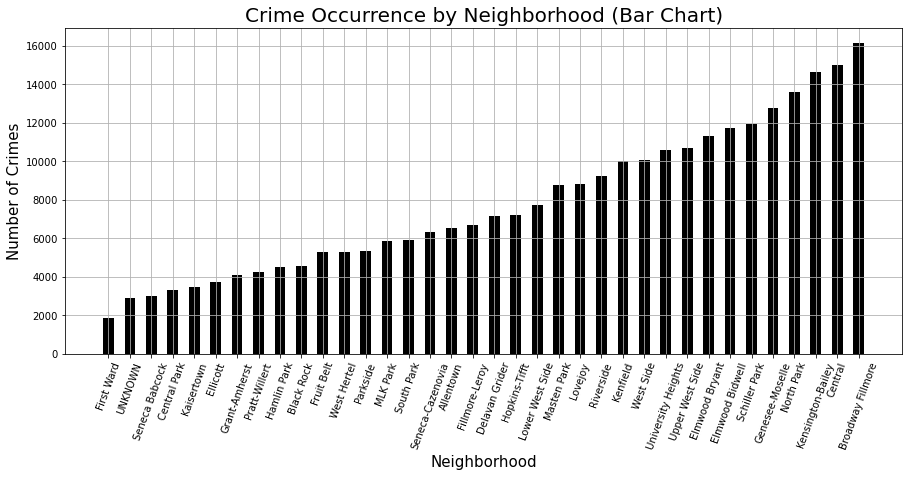

In [45]:
def occurrence_by_neighborhood(conn_norm):
    sql_statement = """
    select COUNT(*) as 'Number of Crimes', Neighborhood from (
        select c.CaseNum, n.Neighborhood from
        Cases as c INNER JOIN Neighborhood as n ON c.NeighborhoodID = n.NeighborhoodID
    ) where Neighborhood <> '' group by Neighborhood
    """
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df

ylist, xlist = zip(*sorted(zip(occurrence_by_neighborhood(conn_norm)['Number of Crimes'], occurrence_by_neighborhood(conn_norm)['Neighborhood'])))

plt.rcParams['figure.figsize'] = (15, 6)

plt.bar(xlist, ylist, width = 0.5,color='Black')
plt.xlabel("Neighborhood", fontsize=15)
plt.xticks(rotation = 70)
plt.ylabel("Number of Crimes", fontsize=15)
plt.title("Crime Occurrence by Neighborhood (Bar Chart)", fontsize=20)
plt.grid(True)
plt.show()

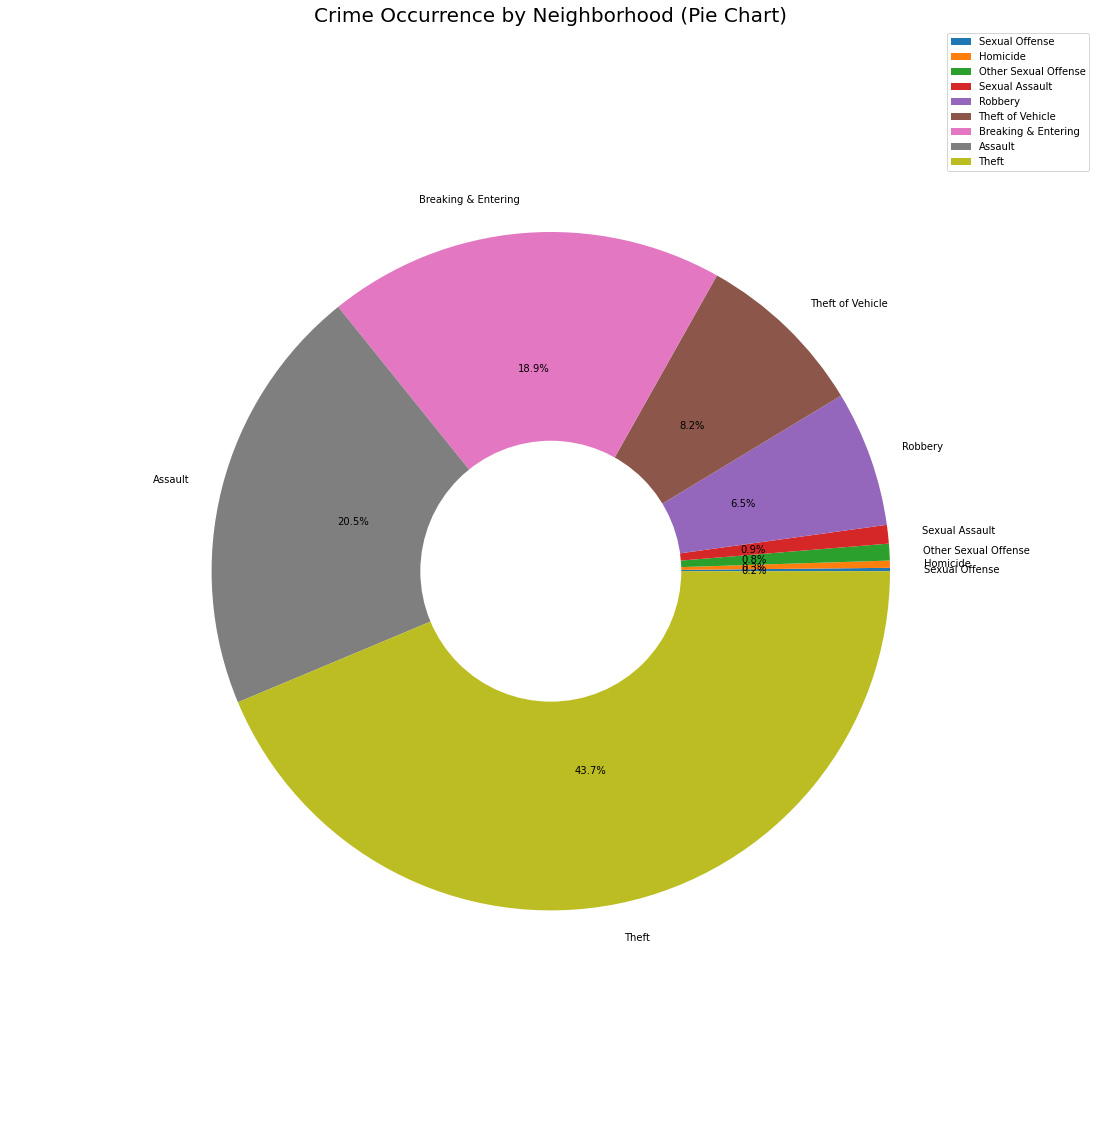

In [103]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.pie(x = ylist, labels = xlist, radius = 0.78, autopct = '%0.1f%%')
plt.title("Crime Occurrence by Neighborhood (Pie Chart)", fontsize=20)
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc = "upper right")
plt.show()

# Crime Occurance by Neighborhood with Parent Incident

In [ ]:
High: North park
Low: First Ward

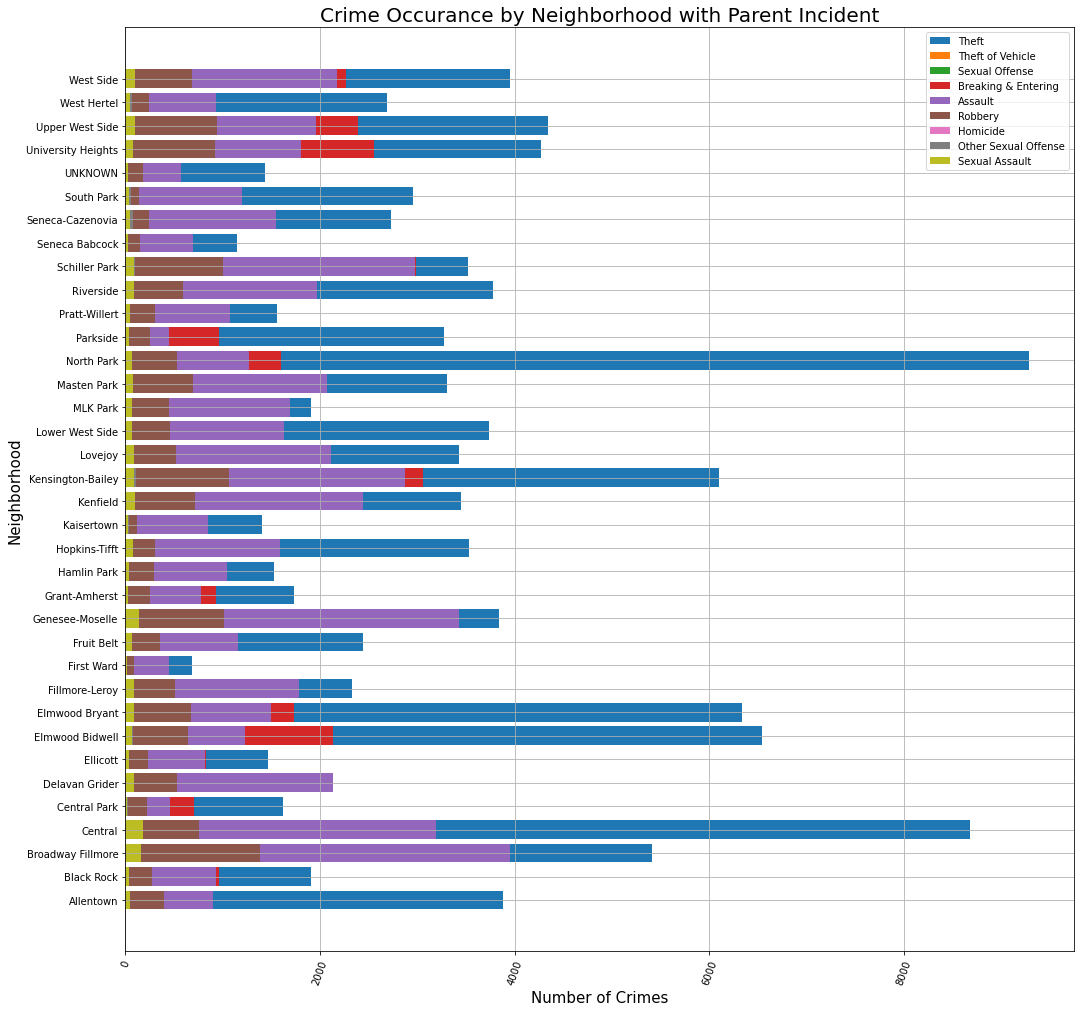

In [97]:
def occurrence_by_neighborhood_by_parent_incident(conn_norm, parent_incident):
    sql_statement = """
    select COUNT(*) as 'Number of Crimes', Neighborhood from (
        select c.CaseNum, n.Neighborhood, p.ParentIncident as ParentIncident from
        Cases as c INNER JOIN Neighborhood as n ON c.NeighborhoodID = n.NeighborhoodID
        INNER JOIN ParentIncident as p ON c.ParentIncidentID = p.ParentIncidentID
    )where ParentIncident = '{}' and Neighborhood <>  '' group by Neighborhood
    """.format(parent_incident)
    
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df


x = occurrence_by_neighborhood(conn_norm)['Neighborhood']

for parent_incident in pd.read_sql_query("select ParentIncident from ParentIncident", conn_norm)['ParentIncident']:
    y = occurrence_by_neighborhood_by_parent_incident(conn_norm, parent_incident)['Number of Crimes'].reindex(range(0, 36))
    plt.barh(x, y, label = parent_incident)

plt.rcParams['figure.figsize'] = (20, 20)
plt.ylabel("Neighborhood",fontsize=15)
plt.xlabel("Number of Crimes",fontsize=15)
plt.title("Crime Occurance by Neighborhood with Parent Incident", fontsize=20)

plt.xticks(rotation = 70)
plt.legend()
plt.grid(True)
plt.show()

# Crime trend over the last 15 years

High: 2007
Low: 2021

This shows the Crime rate has came down with the time.

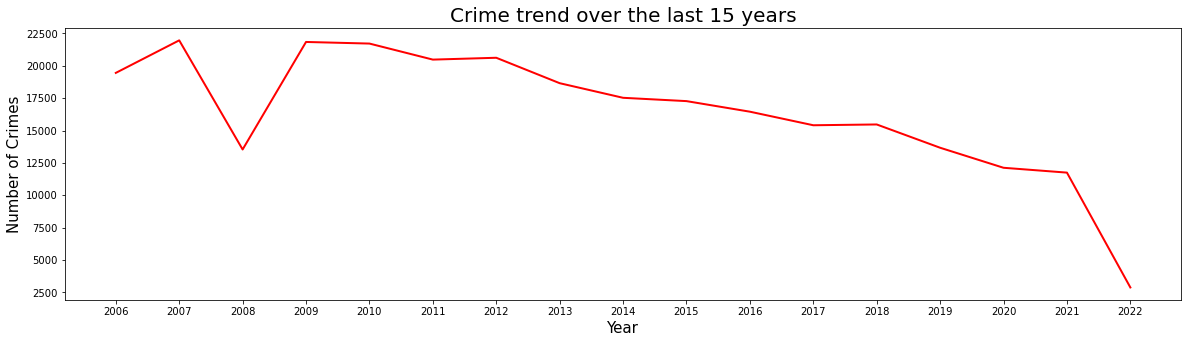

In [82]:
import matplotlib.pyplot as plt
def Crime_occurance_trend(conn_norm):
    sql_statement = """
    select COUNT(*) as 'Number of Crimes', strftime('%Y', incidentdatetime) as 'Year' from  Cases where strftime('%Y', incidentdatetime) between '2006' and '2022' group by Year
    """
    df = pd.read_sql_query(sql_statement, conn_norm)
    return df

plt.rcParams['figure.figsize'] = (20, 5)

x = Crime_occurance_trend(conn_norm)['Year']
y = Crime_occurance_trend(conn_norm)['Number of Crimes']
plt.plot(x, y, linewidth=2,color='red')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of Crimes",fontsize=15)
plt.title('Crime trend over the last 15 years',fontsize=20)
plt.show()

# Non Linear Regression Exponential Model

Prediction: 2022- 11775.43775336, 2023-11311.45371784, 2024-10865.75190585, 2025-10437.61194843, 2026-10026.34186111, 2027-9631.27692547

The number of crimes will become 0 after 18536 years

Following were the constants are :
C1 = 23322.436
C2 = -0.0402

Iterations took to arrive at solution = 8
[22403.46906219 21520.71190251 20672.73775794 19858.17608378
 19075.71033852 18324.0758559  17602.05780095 16908.48920647
 16242.24908691 15602.2606266  14987.48943928 14396.94189633
 13829.66352077 13284.73744458 12761.28292684 12258.45393017
 11775.43775336 11311.45371784 10865.75190585 10437.61194843
 10026.34186111  9631.27692547]
The number of crimes will become 0 after 18536 years


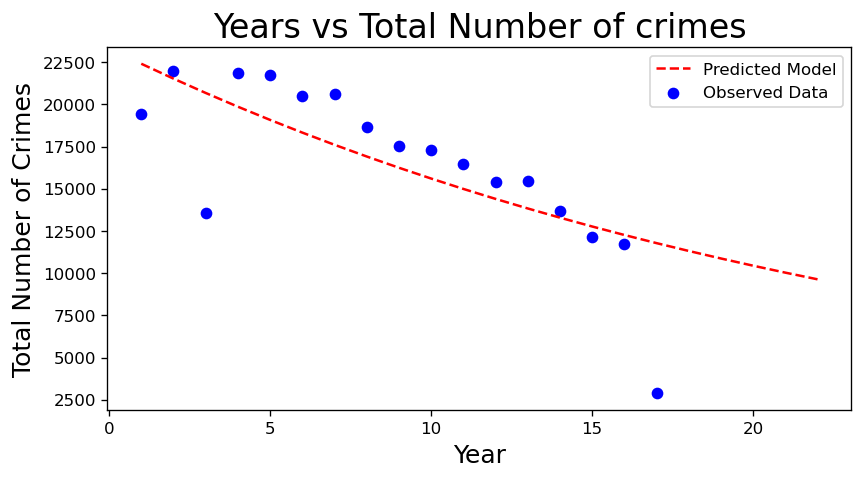

In [84]:
import numpy as np
years = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
no_of_crimes = np.array([19446,21958,13535,21834,21710,20472,20614,18652,17524,17268,16452,15405,15466,13669,12123,11749,2886])

Initial = [22359,-0.006]


Jacobian = np.zeros([len(years), len(Initial)])
I = 0


while True:
    I += 1

    partial1 = np.exp(Initial[1]*years)
    partial2 = np.exp(Initial[1]*years)*Initial[0]*years
    
    Jacobian[:,0] = partial1
    Jacobian[:,1] = partial2
    
    
    residual = no_of_crimes - (Initial[0]*np.exp(Initial[1]*years))

    
    term1 = np.linalg.inv(np.dot(-1*Jacobian.T, Jacobian))
    term2 = np.dot(term1, Jacobian.T)
    term3 = np.dot(term2, residual)

    
    final = Initial - term3
    abs_error = abs(final-Initial)

    if max(abs_error) <= 1e-2:
        break
    Initial = final


constant1 = float('{:.4f}'.format(Initial[0]))
constant2 = float('{:.4f}'.format(Initial[1]))

print(f'Following were the constants are :\nC1 = {constant1}\nC2 = {constant2}\n\nIterations took to arrive at solution = {I}')


x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
pred = constant1*np.exp(constant2*x)
print(pred)

plt.figure(1, figsize = (8,4), dpi = 120)
plt.scatter(x=years, y=no_of_crimes, c='blue', marker='o', label ='Observed Data')
plt.plot(x,pred, 'r--', label='Predicted Model')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Total Number of Crimes",fontsize=15)
plt.title('Years vs Total Number of crimes',fontsize=20)
plt.legend()

no_of_crimes=[]
y=19446
i=16
while y!=0:    
    y = 23322.4379 * np.exp(-0.0402*i)
    if y==0:
        #print(i)
        break
    i+=1
    
print(f'The number of crimes will become 0 after {i} years')


# Conclusion

The analysis performed can be used to understand the locations at which crime rate is quite high and need to be avoided by people in visiting the place, north park during peak hours of 12-1 am on Fridays and Saturdays. This analysis helps police department to heighten security at these mentioned places on days during these timings. This also can be useful for landlords to decide their property prices at these neighborhoods and people to avoid dangerous places while purchasing new properties.
We have used regression analysis to fit data model of years and number of crimes happened in which convergence occurred at the error 10^-2 and it will take 18509 years to crimes become 0 which is practically impossible.